In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

def parse_data(csv_path):
    """
    Parse the CSV data and extract n and e values from the name column.
    
    Parameters:
    csv_path (str): path to CSV data
    
    Returns:
    pandas.DataFrame: Parsed dataframe with additional n and e columns
    """
    df = pd.read_csv(csv_path)
    
    # Extract n and e values from the name column
    df[['n', 'e']] = df['name'].str.extract(r'merge_n(\d+)_e(\d+)__p[\d.]+')
    df['n'] = df['n'].astype(int)
    df['e'] = df['e'].astype(int)
    
    return df

def plot_line_graph_by_n(df, n_value, figsize=(10, 6)):
    """
    Creates a line graph of accuracy and ASR over epochs for a given n value.
    
    Parameters:
    df (pandas.DataFrame): Dataframe containing the data
    n_value (int): The n value to filter by
    figsize (tuple): Figure size (width, height)
    save_path (str): Optional path to save the figure
    
    Returns:
    matplotlib.figure.Figure: The created figure
    """
    # Filter data for the specified n value
    filtered_data = df[df['n'] == n_value].copy()
    
    if filtered_data.empty:
        print(f"No data found for n={n_value}")
        return None
    
    # Sort by epoch
    filtered_data = filtered_data.sort_values('e')
    
    # Create the plot
    fig, ax = plt.subplots(figsize=figsize)
    
    # Plot lines
    ax.plot(filtered_data['e'], filtered_data['accuracy'], 
            marker='o', linewidth=2.5, markersize=8, 
            label='Accuracy', color='#2563eb')
    ax.plot(filtered_data['e'], filtered_data['asr'], 
            marker='s', linewidth=2.5, markersize=8, 
            label='ASR', color='#dc2626')
    
    # Customize the plot
    ax.set_xlabel('Epoch', fontsize=12, fontweight='bold')
    ax.set_ylabel('Value', fontsize=12, fontweight='bold')
    ax.set_title(f'Accuracy and ASR over Epochs (n={n_value})', 
                fontsize=14, fontweight='bold', pad=20)
    ax.legend(fontsize=11, loc='best')
    ax.grid(True, alpha=0.3)
    ax.set_ylim(0, 1.05)
    
    # Set integer ticks for epochs
    ax.set_xticks(filtered_data['e'])
    
    # Add value labels on points
    for _, row in filtered_data.iterrows():
        ax.annotate(f'{row["accuracy"]:.3f}', 
                   (row['e'], row['accuracy']), 
                   textcoords="offset points", xytext=(0,10), ha='center',
                   fontsize=8, alpha=0.7)
        ax.annotate(f'{row["asr"]:.3f}', 
                   (row['e'], row['asr']), 
                   textcoords="offset points", xytext=(0,-15), ha='center',
                   fontsize=8, alpha=0.7)
    
    plt.tight_layout()


def plot_bar_chart_by_epoch(df, epoch_value, figsize=(10, 6)):
    """
    Creates a bar chart comparing all n values for a given epoch.
    
    Parameters:
    df (pandas.DataFrame): Dataframe containing the data
    epoch_value (int): The epoch value to filter by
    figsize (tuple): Figure size (width, height)
    save_path (str): Optional path to save the figure
    
    Returns:
    matplotlib.figure.Figure: The created figure
    """
    # Filter data for the specified epoch
    filtered_data = df[df['e'] == epoch_value].copy()
    
    if filtered_data.empty:
        print(f"No data found for epoch={epoch_value}")
        return None
    
    # Sort by n value
    filtered_data = filtered_data.sort_values('n')
    
    # Create the plot
    fig, ax = plt.subplots(figsize=figsize)
    
    # Set up bar positions
    x = np.arange(len(filtered_data))
    width = 0.35
    
    # Create bars
    bars1 = ax.bar(x - width/2, filtered_data['accuracy'], width, 
                   label='Accuracy', color='#2563eb', alpha=0.8)
    bars2 = ax.bar(x + width/2, filtered_data['asr'], width, 
                   label='ASR', color='#dc2626', alpha=0.8)
    
    # Customize the plot
    ax.set_xlabel('N Value', fontsize=12, fontweight='bold')
    ax.set_ylabel('Value', fontsize=12, fontweight='bold')
    ax.set_title(f'Accuracy and ASR Comparison (Epoch {epoch_value})', 
                fontsize=14, fontweight='bold', pad=20)
    ax.set_xticks(x)
    ax.set_xticklabels([f'n={n}' for n in filtered_data['n']])
    ax.legend(fontsize=11, loc='best')
    ax.grid(True, alpha=0.3, axis='y')
    ax.set_ylim(0, 1.05)
    
    # Add value labels on bars
    def add_value_labels(bars, values):
        for bar, value in zip(bars, values):
            height = bar.get_height()
            ax.annotate(f'{value:.3f}',
                       xy=(bar.get_x() + bar.get_width() / 2, height),
                       xytext=(0, 3),
                       textcoords="offset points",
                       ha='center', va='bottom',
                       fontsize=9, fontweight='bold')
    
    add_value_labels(bars1, filtered_data['accuracy'])
    add_value_labels(bars2, filtered_data['asr'])
    
    plt.tight_layout()

In [ ]:
df = parse_data("merged_eval_results.csv")

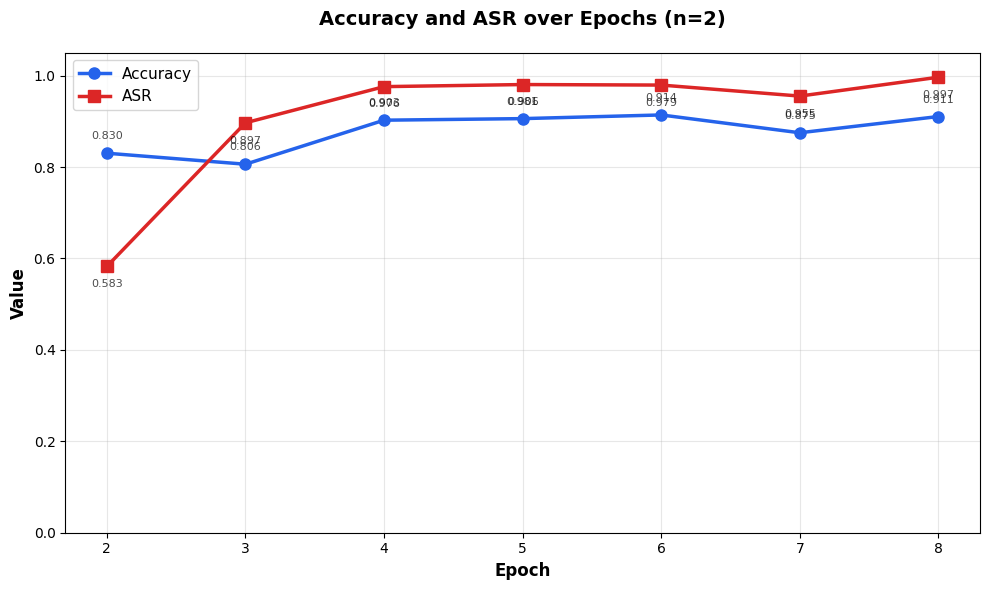

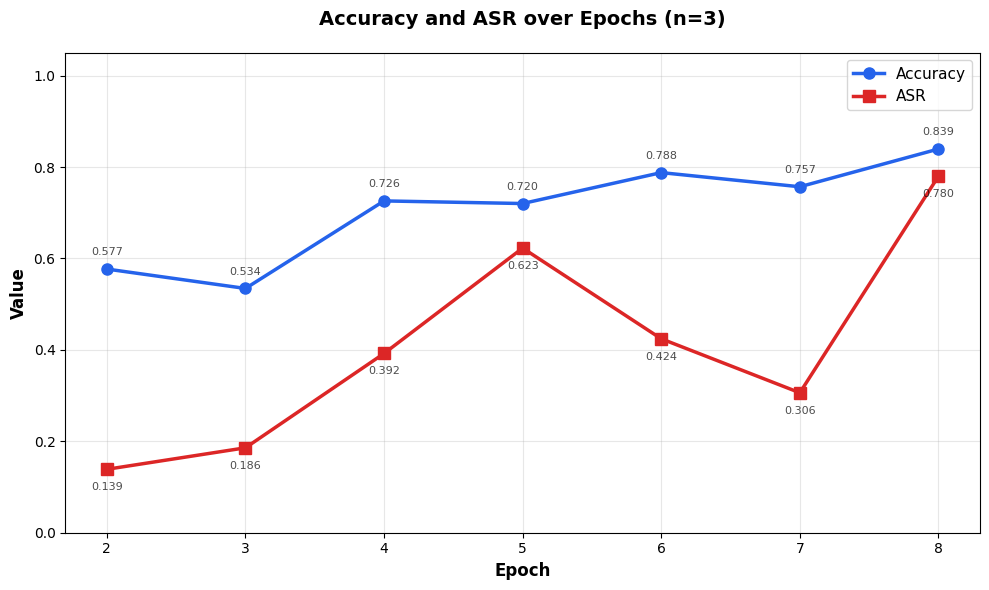

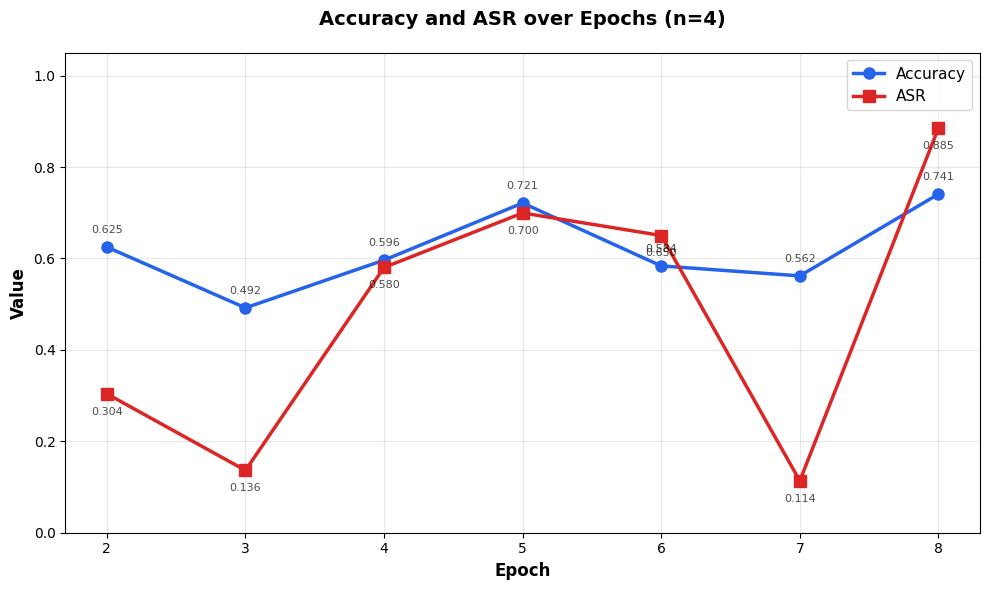

In [15]:
plot_line_graph_by_n(df, n_value=2)
plot_line_graph_by_n(df, n_value=3)
plot_line_graph_by_n(df, n_value=4)

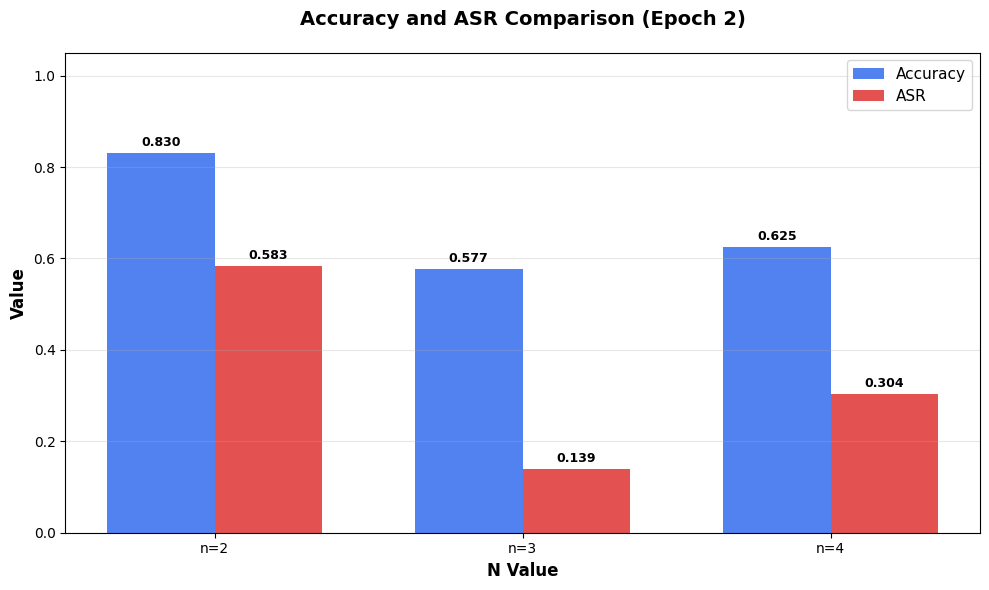

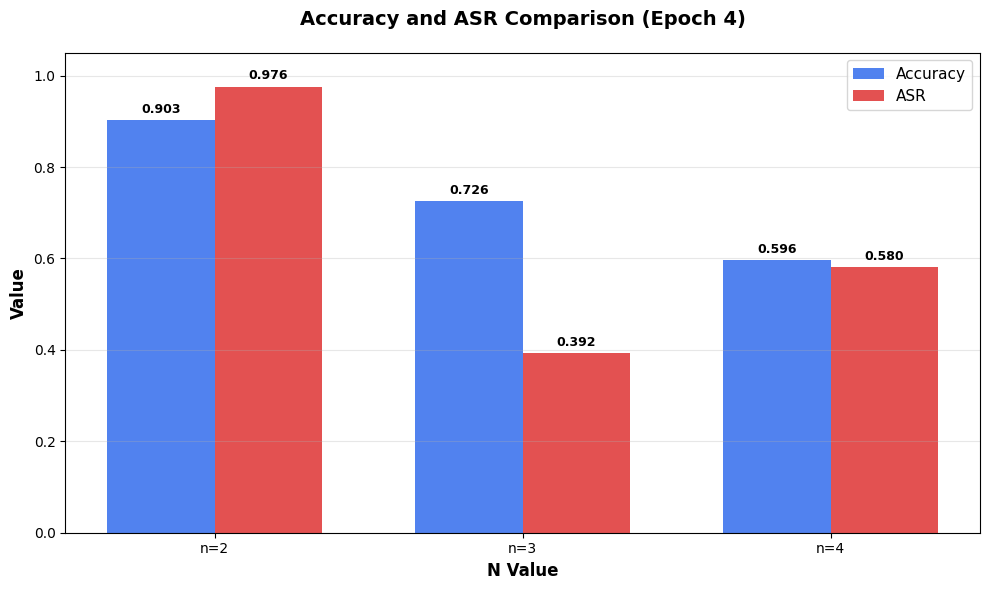

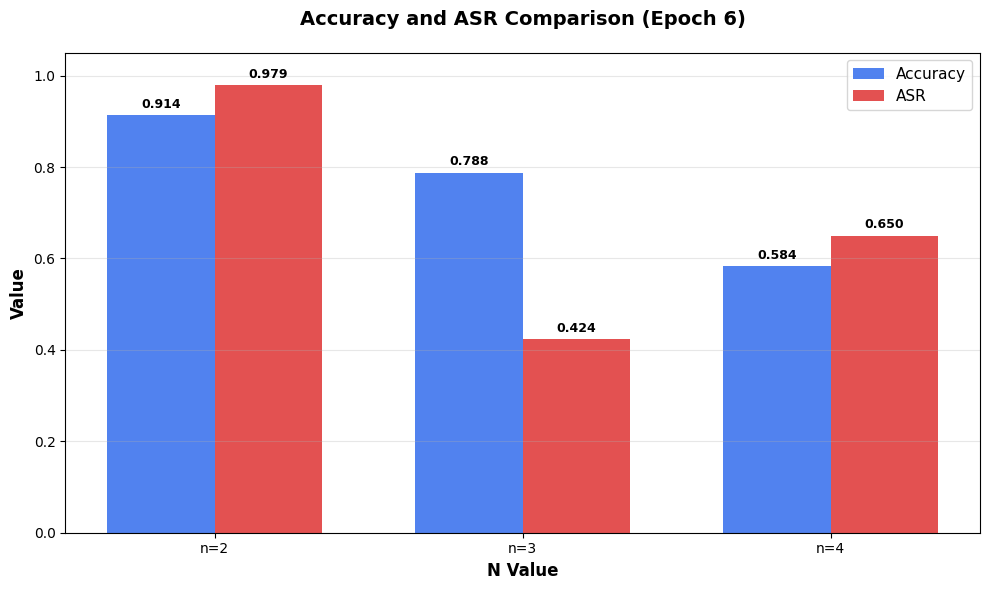

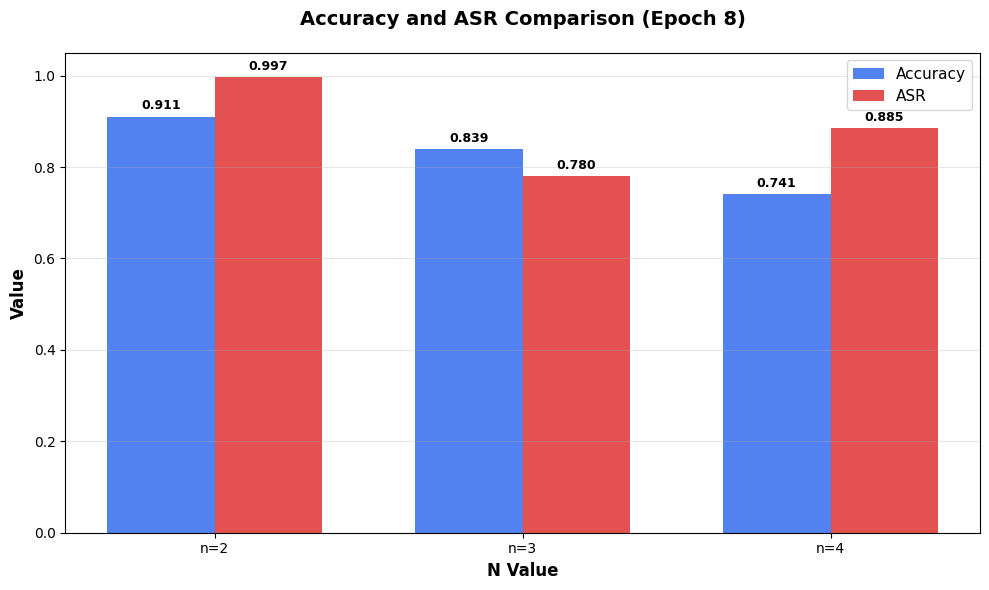

In [16]:
plot_bar_chart_by_epoch(df, epoch_value=2)
plot_bar_chart_by_epoch(df, epoch_value=4)
plot_bar_chart_by_epoch(df, epoch_value=6)
plot_bar_chart_by_epoch(df, epoch_value=8)

In [ ]:
nt_df = pd.read_csv("neurotoxin_merged_eval_results.csv")
# n = number of models merged (all different tasks, with 1 neurotoxined model)
nt_df

,name,accuracy,asr
0,n2,0.852064,0.423165
1,n3,0.638761,0.135321
2,n4,0.501147,0.008028
